In [15]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [18]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1./255,
)
validation_image_generator = ImageDataGenerator(
    rescale=1./255,
)
test_image_generator = ImageDataGenerator(
    rescale=1./255,
)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    seed=123,
)
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    seed=123,
)
test_data_gen = test_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = test_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=False,
    classes=['.'],
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


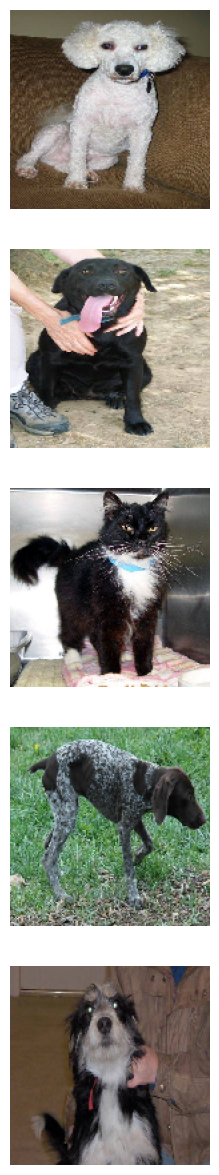

In [19]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [20]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.5,1.5),
)


Found 2000 images belonging to 2 classes.


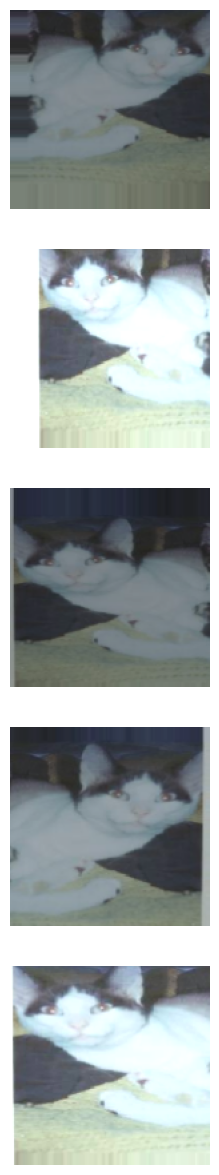

In [21]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [22]:
# 7
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# 8
steps_per_epoch = total_train // batch_size
validation_steps = total_val // batch_size

history = model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= validation_steps
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.6140 - loss: 0.6478 - val_accuracy: 0.6462 - val_loss: 0.6379
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6719 - loss: 0.6402 - val_accuracy: 0.7115 - val_loss: 0.6015
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.6356 - loss: 0.6321 - val_accuracy: 0.6440 - val_loss: 0.6229
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6172 - loss: 0.6279 - val_accuracy: 0.6058 - val_loss: 0.6314
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.6330 - loss: 0.6231 - val_accuracy: 0.6674 - val_loss: 0.6014
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.6875 - loss: 0.6112 - val_accuracy: 0.7115 - val_loss: 0.6063
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 134s 7s/step - accuracy: 0.6598 - loss: 0.5983 - val_accuracy: 0.6674 - val_loss: 0.5903
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.6719 - loss: 0.5905 - val_accuracy: 0.6731 - va

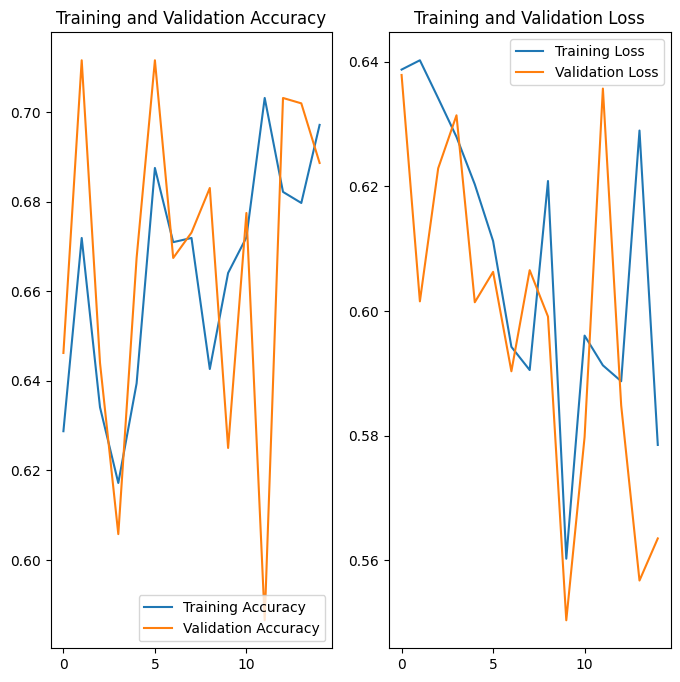

In [29]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


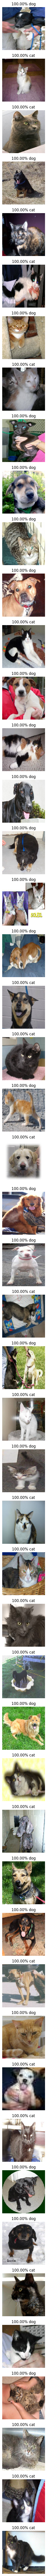

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!


In [38]:
# 11

probabilities = model.predict(test_data_gen)

for i in range(len(probabilities)):
    if probabilities[i] > 0.5:
      probabilities[i] = 1
    else:
      probabilities[i] = 0

probabilities = [int(prob[0]) for prob in probabilities]

test_images, _ = next(test_data_gen)
plotImages(test_images[:len(probabilities)], probabilities[:len(probabilities)])

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")